In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import itertools

In [241]:
df = pd.read_csv("train.csv", index_col= 0)
display(df.head())

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [242]:
display(df.shape)

(1460, 80)

In [243]:
display(df.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [244]:
columns_to_select = [
    'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
    'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 
    'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
    'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
    'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd'
]

# Select columns
df_selected = df[columns_to_select]

In [245]:
display(df_selected.head(5))

,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8
2,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6
3,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6
4,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7
5,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9


In [246]:
df_selected.columns

Index(['ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd'],
      dtype='object')

In [247]:
# Missing values
missing_values = df_selected.isnull().sum()

# Duplicate rows
duplicates = df_selected.duplicated().sum()

display(missing_values)
display(duplicates)

ExterCond        0
Foundation       0
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinSF1       0
BsmtFinType2    38
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
dtype: int64

13

In [248]:
# Print all dupes, originals and duplicates
duplicates = df_selected[df_selected.duplicated(keep=False)]
display(duplicates)

,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,
120,TA,PConc,Gd,TA,No,Unf,0,Unf,0,728,728,GasA,Ex,Y,SBrkr,728,728,0,1456,0,0,2,1,3,1,Gd,8
146,TA,PConc,Gd,TA,No,Unf,0,Unf,0,970,970,GasA,Ex,Y,SBrkr,970,739,0,1709,0,0,2,0,3,1,Gd,7
194,TA,PConc,Gd,TA,No,Unf,0,Unf,0,970,970,GasA,Ex,Y,SBrkr,970,739,0,1709,0,0,2,0,3,1,Gd,7
204,TA,PConc,Gd,TA,Av,GLQ,662,Unf,0,186,848,GasA,Ex,Y,SBrkr,848,0,0,848,1,0,1,0,1,1,Gd,3
226,TA,CBlock,TA,TA,No,Unf,0,Unf,0,630,630,GasA,TA,Y,SBrkr,630,672,0,1302,0,0,2,1,3,1,TA,6
253,TA,PConc,Gd,TA,No,Unf,0,Unf,0,798,798,GasA,Ex,Y,SBrkr,798,842,0,1640,0,0,2,1,3,1,Gd,6
283,TA,PConc,Gd,TA,No,GLQ,904,Unf,0,410,1314,GasA,Ex,Y,SBrkr,1314,0,0,1314,1,0,2,0,2,1,Gd,6
286,TA,PConc,Gd,TA,No,Unf,0,Unf,0,625,625,GasA,Ex,Y,SBrkr,625,625,0,1250,0,0,2,1,2,1,Gd,5
343,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6


In [249]:
#Sort Duplicates by Living Area in order to see which pairs are dupes

duplicates_sorted = duplicates.sort_values(by='GrLivArea')
display(duplicates_sorted)

,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,
722,TA,PConc,Gd,TA,Av,GLQ,662,Unf,0,186,848,GasA,Ex,Y,SBrkr,848,0,0,848,1,0,1,0,1,1,Gd,3
594,TA,PConc,Gd,TA,Av,GLQ,685,Unf,0,163,848,GasA,Ex,Y,SBrkr,848,0,0,848,1,0,1,0,1,1,Gd,4
204,TA,PConc,Gd,TA,Av,GLQ,662,Unf,0,186,848,GasA,Ex,Y,SBrkr,848,0,0,848,1,0,1,0,1,1,Gd,3
1369,TA,PConc,Gd,TA,Av,GLQ,685,Unf,0,163,848,GasA,Ex,Y,SBrkr,848,0,0,848,1,0,1,0,1,1,Gd,4
343,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6
1091,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6
832,TA,PConc,Gd,TA,No,Unf,0,Unf,0,600,600,GasA,Ex,Y,SBrkr,520,600,80,1200,0,0,2,1,2,1,Gd,4
1365,TA,PConc,Gd,TA,No,Unf,0,Unf,0,600,600,GasA,Ex,Y,SBrkr,520,600,80,1200,0,0,2,1,2,1,Gd,4
1173,TA,PConc,Gd,TA,No,Unf,0,Unf,0,625,625,GasA,Ex,Y,SBrkr,625,625,0,1250,0,0,2,1,2,1,Gd,5


In [250]:
# Examine the Missing Values

df_with_nans = df_selected[df_selected.isna().any(axis=1)]
display(df_with_nans)

,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,
18,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6
40,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6
91,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4
103,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8
157,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5
183,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7
260,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,4
333,TA,PConc,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7
343,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6


In [251]:
# House with no Basements are coded as Nan

# I replace this with "no basement" to avoid confusion

# Select all columns starting with 'Bsmt'
bsmt_columns = df_selected.columns[df_selected.columns.str.startswith('Bsmt')]

# Replace both NaN and <NA> with 'no basement'
df_selected.loc[:, bsmt_columns] = df_selected.loc[:, bsmt_columns].apply(lambda x: x.fillna('no basement').replace({np.nan: 'no basement'}))

#df_selected.loc[:, df_selected.columns.str.startswith('Bsmt')] = df_selected.loc[:, df_selected.columns.str.startswith('Bsmt')].fillna('no basement')

#df_selected.loc[:, df_selected.columns.str.startswith('Bsmt')] = df_selected.loc[:, df_selected.columns.str.startswith('Bsmt')].replace({np.nan: 'no basement'})



In [252]:
df_selected['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', 'no basement', 'Fa'], dtype=object)

In [253]:
missing_values = df_selected.isnull().sum()
display(missing_values)

ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      1
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
dtype: int64

In [254]:
# NaN in the "Electrical" column

pd.set_option('display.max_columns', 27)
missing_electrical = df_selected[df_selected['Electrical'].isna()]
display(missing_electrical)

,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,
1380,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7


In [255]:
# There is one missing value in Electricity
# Instead of just finding the mode of the electricity variable, I take the mode
# of Electricity for all of the houses that have similar characteristics in terms of
# Central Air, Heating, and Heating QC.

filtered_data = df_selected[(df_selected['CentralAir'] == 'Y') & 
                            (df_selected['Heating'] == 'GasA') & 
                            (df_selected['HeatingQC'] == 'Gd')]

# Mode
mode_electrical = filtered_data['Electrical'].mode()
display(filtered_data.head())

# Display the mode(s)
display(mode_electrical)

,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7
9,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8
32,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1228,1228,GasA,Gd,Y,SBrkr,1228,0,0,1228,0,0,1,1,3,1,Gd,6
34,TA,CBlock,TA,TA,No,Rec,1018,Unf,0,380,1398,GasA,Gd,Y,SBrkr,1700,0,0,1700,0,1,1,1,4,1,Gd,6
38,TA,CBlock,TA,TA,No,Rec,1213,Unf,0,84,1297,GasA,Gd,Y,SBrkr,1297,0,0,1297,0,1,1,0,3,1,TA,5


0    SBrkr
Name: Electrical, dtype: object

In [256]:
# replace the one missing value with the associated mode from above
df_selected.loc[:, 'Electrical'] = df_selected['Electrical'].fillna('SBrkr')

In [257]:
missing_values = df_selected.isnull().sum()
display(missing_values)

## No more Missing values

ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
dtype: int64

In [258]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ExterCond     1460 non-null   object
 1   Foundation    1460 non-null   object
 2   BsmtQual      1460 non-null   object
 3   BsmtCond      1460 non-null   object
 4   BsmtExposure  1460 non-null   object
 5   BsmtFinType1  1460 non-null   object
 6   BsmtFinSF1    1460 non-null   int64 
 7   BsmtFinType2  1460 non-null   object
 8   BsmtFinSF2    1460 non-null   int64 
 9   BsmtUnfSF     1460 non-null   int64 
 10  TotalBsmtSF   1460 non-null   int64 
 11  Heating       1460 non-null   object
 12  HeatingQC     1460 non-null   object
 13  CentralAir    1460 non-null   object
 14  Electrical    1460 non-null   object
 15  1stFlrSF      1460 non-null   int64 
 16  2ndFlrSF      1460 non-null   int64 
 17  LowQualFinSF  1460 non-null   int64 
 18  GrLivArea     1460 non-null   int64 
 19  BsmtFullBat

# Above has replaced the missing values and Identified potential duplicates

# Convert Categorical and Ordinal Variables to Numeric

## Create Lists of Categorical, Ordinal, and Numeric Variables'

In [259]:
cat_vars = ['Foundation', 'Heating', 'Electrical']

ordinal_vars = ['ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
                'CentralAir', 'KitchenQual']                

numeric_vars = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd']


## Create DFs for deeper inspection

In [260]:
df_cat_vars = pd.DataFrame(df_selected[['Foundation', 'Heating', 'Electrical']])

df_ordinal_vars = pd.DataFrame(df_selected[['ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
                'CentralAir', 'KitchenQual']])              

df_numeric_vars = pd.DataFrame(df_selected[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd']])

In [261]:
# Categorical variables
display(df_cat_vars.describe().round(2))
display(df_cat_vars.value_counts().reset_index())

,Foundation,Heating,Electrical
count,1460,1460,1460
unique,6,6,5
top,PConc,GasA,SBrkr
freq,647,1428,1335


,Foundation,Heating,Electrical,count
0,PConc,GasA,SBrkr,636
1,CBlock,GasA,SBrkr,559
2,BrkTil,GasA,SBrkr,98
3,CBlock,GasA,FuseA,56
4,BrkTil,GasA,FuseA,22
5,Slab,GasA,SBrkr,16
6,CBlock,GasA,FuseF,11
7,BrkTil,GasW,SBrkr,9
8,PConc,GasA,FuseA,7
9,BrkTil,GasA,FuseF,6


In [262]:
# Ordinal Variables
display(df_ordinal_vars.describe().round(2))

,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual
count,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,5,5,5,7,7,5,2,4
top,TA,TA,TA,No,Unf,Unf,Ex,Y,TA
freq,1282,649,1311,953,430,1256,741,1365,735


In [263]:
# Crosstabs of Foundation type with different Basement Variables
pd.crosstab(df_selected['Foundation'], df_selected['BsmtQual'], margins=True)

BsmtQual,Ex,Fa,Gd,TA,no basement,All
Foundation,,,,,,
BrkTil,1,17,18,109,1,146
CBlock,2,12,146,465,9,634
PConc,118,5,451,70,3,647
Slab,0,0,0,0,24,24
Stone,0,1,0,5,0,6
Wood,0,0,3,0,0,3
All,121,35,618,649,37,1460


In [264]:
pd.crosstab(df_selected['Foundation'], df_selected['BsmtCond'], margins=True)

BsmtCond,Fa,Gd,Po,TA,no basement,All
Foundation,,,,,,
BrkTil,19,5,2,119,1,146
CBlock,21,18,0,586,9,634
PConc,4,41,0,599,3,647
Slab,0,0,0,0,24,24
Stone,1,1,0,4,0,6
Wood,0,0,0,3,0,3
All,45,65,2,1311,37,1460


In [265]:
pd.crosstab(df_selected['Foundation'], df_selected['BsmtExposure'], margins=True)

BsmtExposure,Av,Gd,Mn,No,no basement,All
Foundation,,,,,,
BrkTil,1,1,15,128,1,146
CBlock,79,54,43,449,9,634
PConc,139,79,55,370,4,647
Slab,0,0,0,0,24,24
Stone,1,0,1,4,0,6
Wood,1,0,0,2,0,3
All,221,134,114,953,38,1460


In [266]:
pd.crosstab(df_selected['Foundation'], df_selected['BsmtFinType1'], margins=True)

BsmtFinType1,ALQ,BLQ,GLQ,LwQ,Rec,Unf,no basement,All
Foundation,,,,,,,,
BrkTil,12,15,2,11,19,86,1,146
CBlock,161,119,79,50,107,109,9,634
PConc,47,14,334,12,7,230,3,647
Slab,0,0,0,0,0,0,24,24
Stone,0,0,1,0,0,5,0,6
Wood,0,0,2,1,0,0,0,3
All,220,148,418,74,133,430,37,1460


In [267]:
pd.crosstab(df_selected['Foundation'], df_selected['BsmtFinType2'], margins=True)

BsmtFinType2,ALQ,BLQ,GLQ,LwQ,Rec,Unf,no basement,All
Foundation,,,,,,,,
BrkTil,2,1,0,1,2,139,1,146
CBlock,12,29,7,40,44,493,9,634
PConc,5,3,7,5,8,615,4,647
Slab,0,0,0,0,0,0,24,24
Stone,0,0,0,0,0,6,0,6
Wood,0,0,0,0,0,3,0,3
All,19,33,14,46,54,1256,38,1460


In [268]:
# Numric variables
display(df_numeric_vars.describe().round(2))

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd
count,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.52
std,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63
min,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
25%,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00
50%,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00
75%,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00
max,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00,3.00,2.00,8.00,3.00,14.00


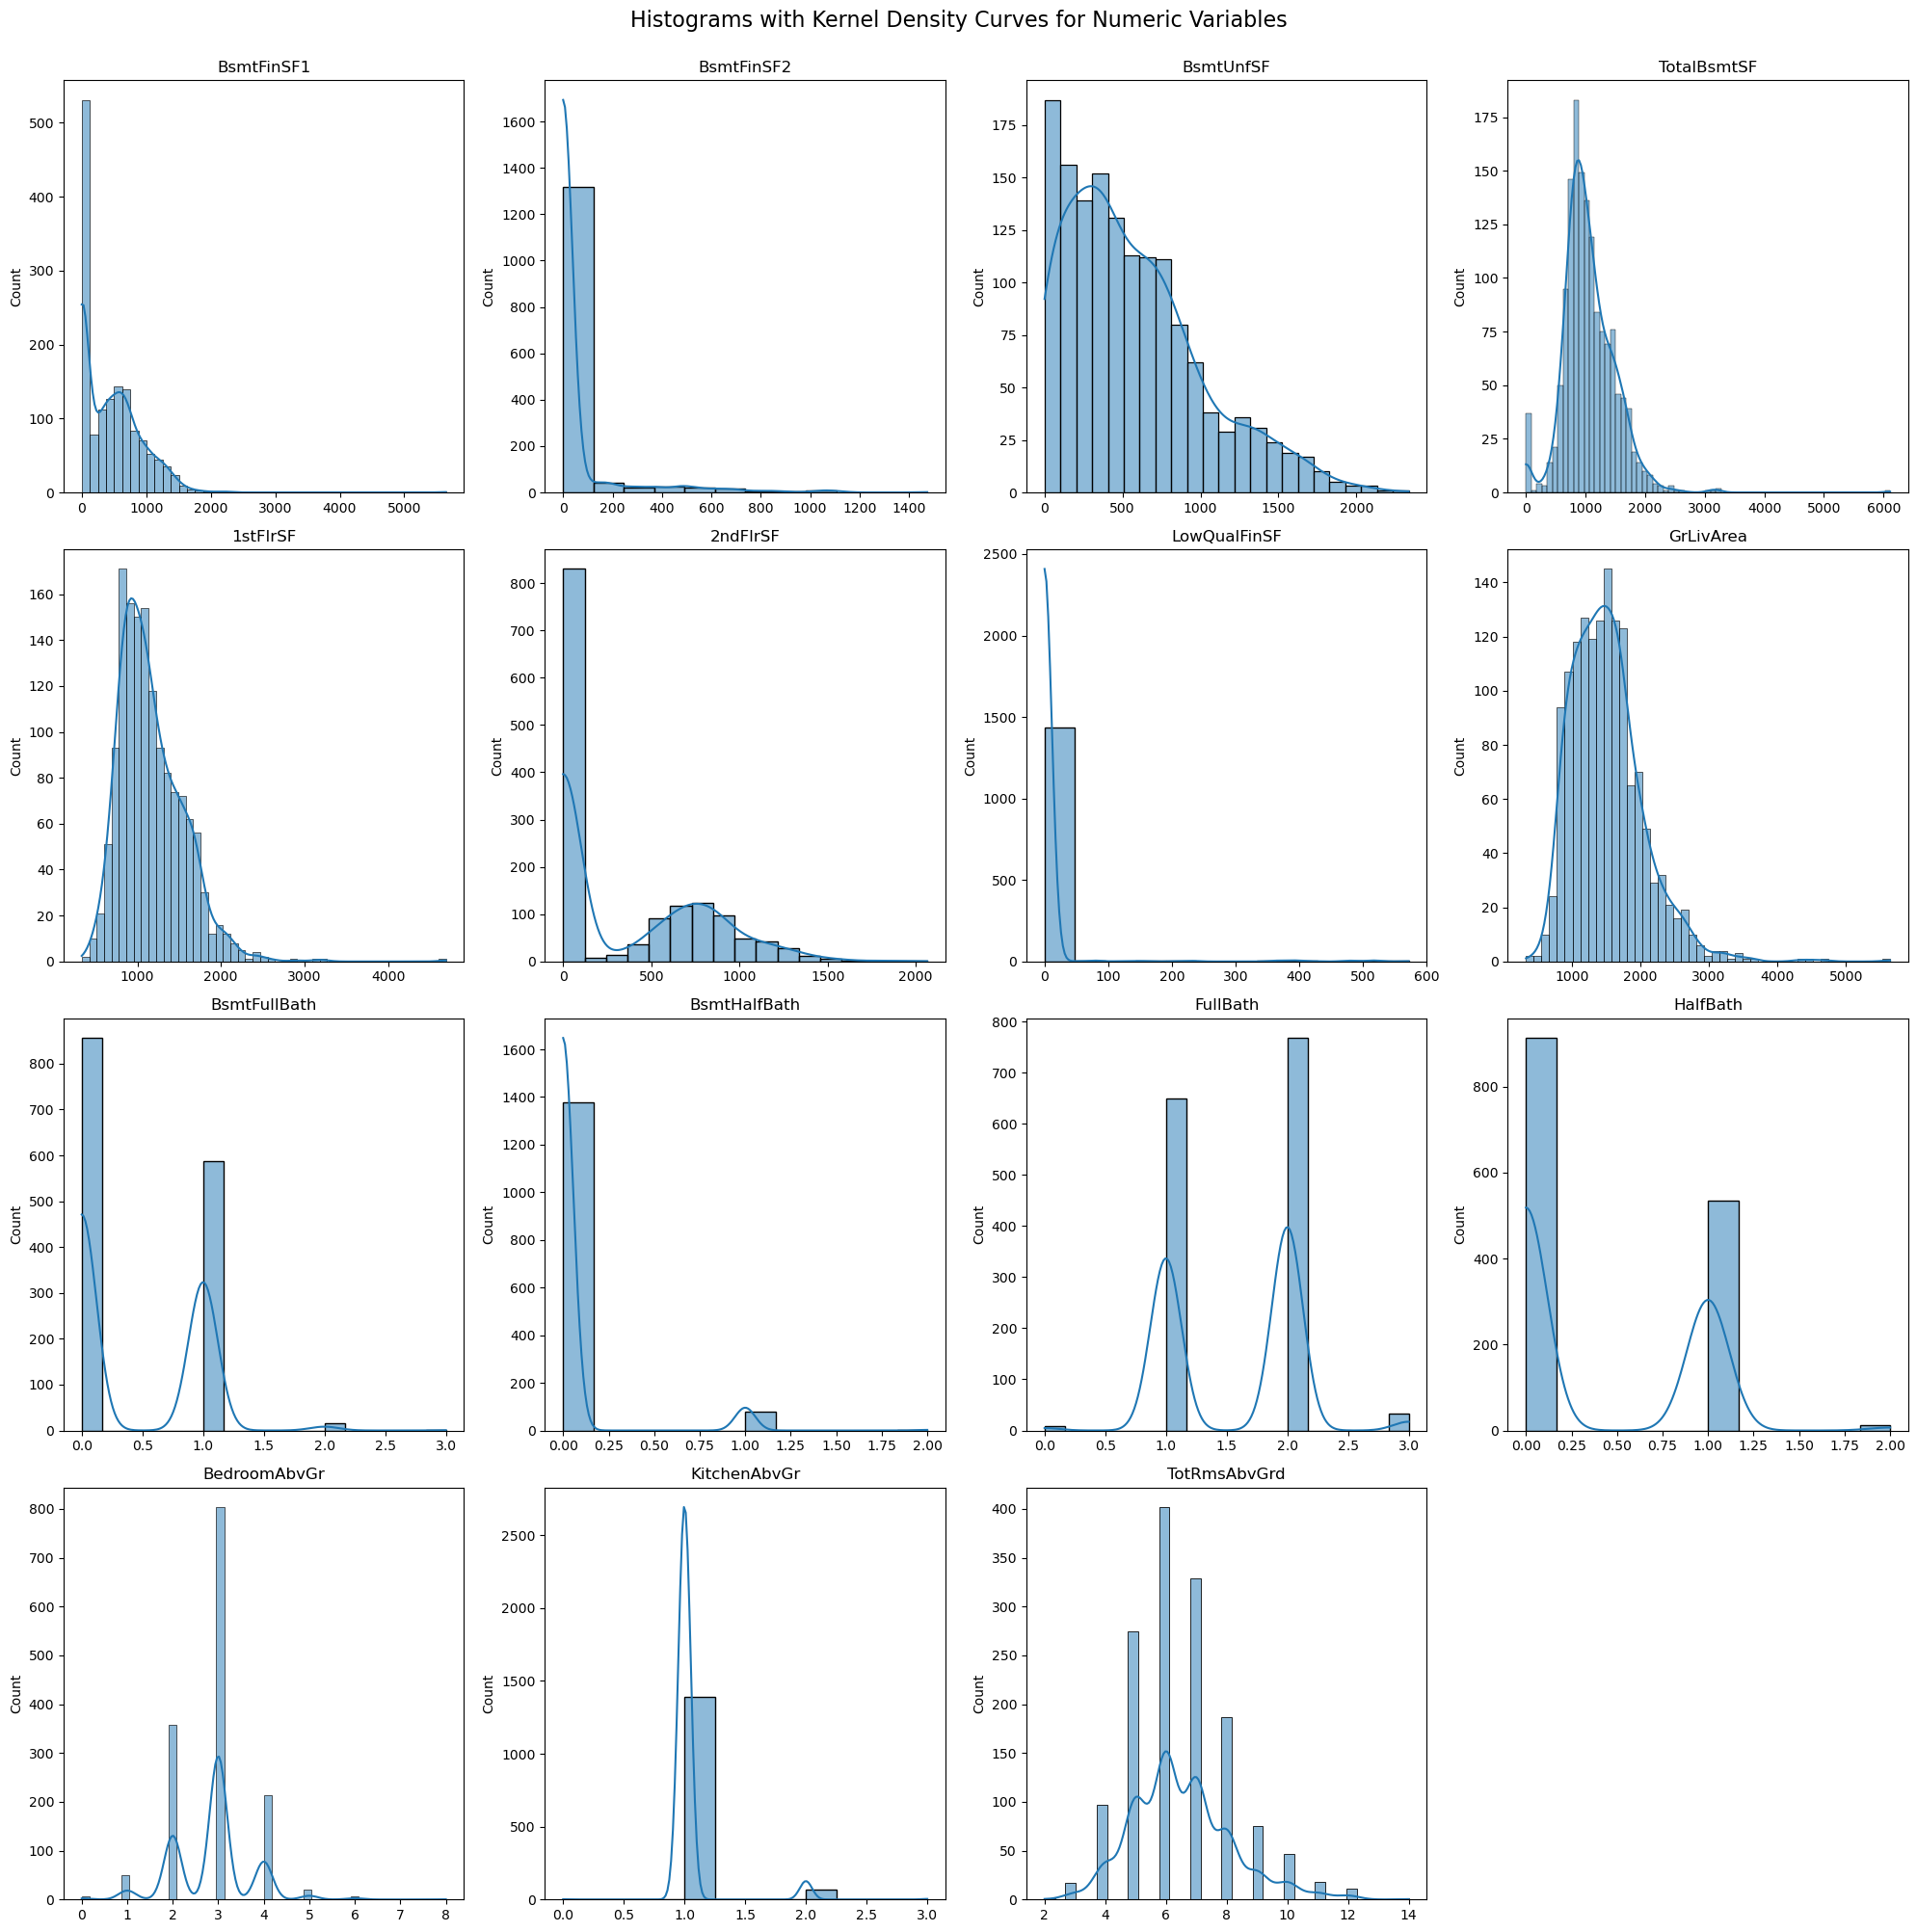

In [269]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
fig.suptitle('Histograms with Kernel Density Curves for Numeric Variables', fontsize=16, y=1.0)

plt.subplots_adjust(top=1.0, hspace=1.0, wspace=0.3)
axes = axes.flatten()

for i, column in enumerate(df_numeric_vars.columns):
    if i < 15:  
        sns.histplot(df_numeric_vars[column], kde=True, ax=axes[i])
        axes[i].set_title(column)
        axes[i].set_xlabel('')

if len(df_numeric_vars.columns) < 16:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

## Create dictionary of variable codings

In [270]:
var_dict = {
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtQual': ['no basement', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtCond': ['no basement', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtExposure': ['no basement', 'No', 'Mn', 'Av', 'Gd'],
    'BsmtFinType1': ['no basement', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BsmtFinType2': ['no basement', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'CentralAir': ['N', 'Y'],
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex']
}

In [271]:
df_selected = df_selected.copy()

# Define binary variables
binary_vars = ['CentralAir']

def create_mapping(categories, variable):
    mapping = {}
    
    # Handle binary variables
    if variable in binary_vars:
        mapping = {'N': 0, 'Y': 1}
        return mapping
    
    # Handle ordinal variables
    start_idx = 0
    if categories[0] == 'no basement':
        mapping['no basement'] = 0
        start_idx = 1
    
    for i, category in enumerate(categories[start_idx:], start=1):
        mapping[category] = i
        
    return mapping

# Create all mappings and apply them to the dataframe
for variable, categories in var_dict.items():
    # Create mapping for this variable
    mapping = create_mapping(categories, variable)
    
    # Apply mapping using .map()
    df_selected[variable] = df_selected[variable].map(mapping)
    
    # Convert to int64
    df_selected[variable] = df_selected[variable].astype('int64')
    
    # Print results for verification
    print(f"\nProcessed {variable}:")
    print("Mapping:", mapping)
    print("Unique values in DataFrame:", df_selected[variable].unique())


Processed ExterCond:
Mapping: {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
Unique values in DataFrame: [3 4 2 1 5]

Processed BsmtQual:
Mapping: {'no basement': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
Unique values in DataFrame: [4 3 5 0 2]

Processed BsmtCond:
Mapping: {'no basement': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
Unique values in DataFrame: [3 4 0 2 1]

Processed BsmtExposure:
Mapping: {'no basement': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
Unique values in DataFrame: [1 4 2 3 0]

Processed BsmtFinType1:
Mapping: {'no basement': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
Unique values in DataFrame: [6 5 1 3 4 0 2]

Processed BsmtFinType2:
Mapping: {'no basement': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
Unique values in DataFrame: [1 4 0 5 3 2 6]

Processed HeatingQC:
Mapping: {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
Unique values in DataFrame: [5 4 3 2 1]

Processed CentralAir:
Mapping: {'N': 0, 'Y': 1}
Unique

In [272]:
df_selected.isnull().sum()

ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
dtype: int64

In [273]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ExterCond     1460 non-null   int64 
 1   Foundation    1460 non-null   object
 2   BsmtQual      1460 non-null   int64 
 3   BsmtCond      1460 non-null   int64 
 4   BsmtExposure  1460 non-null   int64 
 5   BsmtFinType1  1460 non-null   int64 
 6   BsmtFinSF1    1460 non-null   int64 
 7   BsmtFinType2  1460 non-null   int64 
 8   BsmtFinSF2    1460 non-null   int64 
 9   BsmtUnfSF     1460 non-null   int64 
 10  TotalBsmtSF   1460 non-null   int64 
 11  Heating       1460 non-null   object
 12  HeatingQC     1460 non-null   int64 
 13  CentralAir    1460 non-null   int64 
 14  Electrical    1460 non-null   object
 15  1stFlrSF      1460 non-null   int64 
 16  2ndFlrSF      1460 non-null   int64 
 17  LowQualFinSF  1460 non-null   int64 
 18  GrLivArea     1460 non-null   int64 
 19  BsmtFullBat

In [ ]:
# Check for inconsistencies
inconsistent_rows = df_selected[
    ((df_selected['BsmtQual'] == 0) != (df_selected['BsmtCond'] == 0)) |
    ((df_selected['BsmtQual'] == 0) != (df_selected['BsmtExposure'] == 0)) |
    ((df_selected['BsmtQual'] == 0) != (df_selected['BsmtFinType1'] == 0)) |
    ((df_selected['BsmtQual'] == 0) != (df_selected['BsmtFinType2'] == 0))
]

print(f"Inconsistent rows: {len(inconsistent_rows)}")
print("\nDetails of inconsistent rows:")
print(inconsistent_rows[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']])

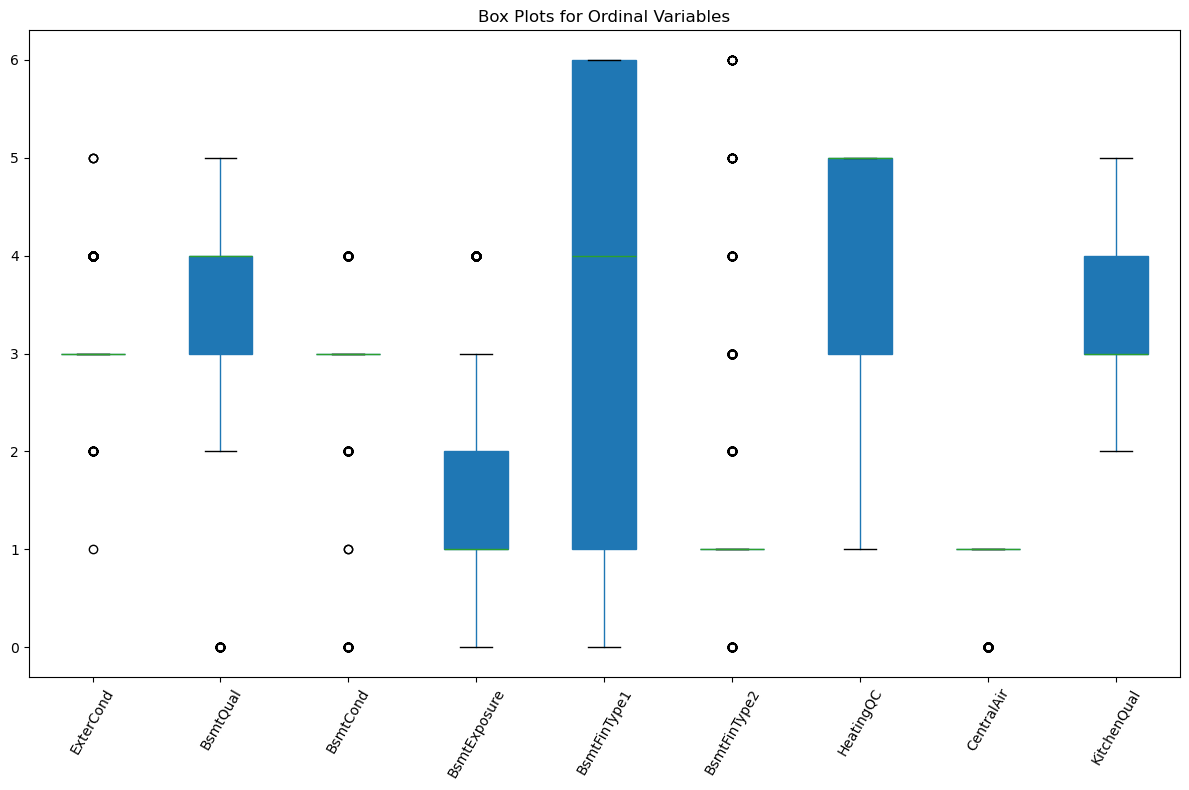

In [277]:
# Plot the Ordinal Variables

plt.figure(figsize=(12, 8))
df_selected[list(var_dict.keys())].boxplot(rot=60, patch_artist=True, grid=False)
plt.title('Box Plots for Ordinal Variables')
plt.tight_layout()

# Encode Categorical Variables Using the One Hot Encoder

In [83]:
# Create and fit the encoder
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='error')
encoded_cats = encoder.fit_transform(df_selected[cat_vars])

# Get feature names and create DataFrame with boolean type
feature_names = encoder.get_feature_names_out(cat_vars)
encoded_df = pd.DataFrame(encoded_cats, columns=feature_names, index=df.index).astype(bool)

# Drop original categorical columns and merge with encoded ones
df_selected = df_selected.drop(columns=cat_vars)
df_final = pd.concat([df_selected, encoded_df], axis=1)

#change CentraAir to boolean
df_final['CentralAir'] = df_final['CentralAir'].astype(bool)

# Verification prints
print("Original df_selected shape:", df_selected.shape)
print("encoded_df shape:", encoded_df.shape)
print("Final merged df shape:", df_final.shape)
print("\nColumn types in final dataframe:")
print(df_final.dtypes.value_counts())

Original df_selected shape: (1460, 24)
encoded_df shape: (1460, 14)
Final merged df shape: (1460, 38)

Column types in final dataframe:
int64    23
bool     15
Name: count, dtype: int64


In [84]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ExterCond          1460 non-null   int64
 1   BsmtQual           1460 non-null   int64
 2   BsmtCond           1460 non-null   int64
 3   BsmtExposure       1460 non-null   int64
 4   BsmtFinType1       1460 non-null   int64
 5   BsmtFinSF1         1460 non-null   int64
 6   BsmtFinType2       1460 non-null   int64
 7   BsmtFinSF2         1460 non-null   int64
 8   BsmtUnfSF          1460 non-null   int64
 9   TotalBsmtSF        1460 non-null   int64
 10  HeatingQC          1460 non-null   int64
 11  CentralAir         1460 non-null   bool 
 12  1stFlrSF           1460 non-null   int64
 13  2ndFlrSF           1460 non-null   int64
 14  LowQualFinSF       1460 non-null   int64
 15  GrLivArea          1460 non-null   int64
 16  BsmtFullBath       1460 non-null   int64
 17  BsmtHalfBath       

In [278]:
basement_vars = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

# Rows where ANY basement variable is NOT "no basement"
inconsistent_rows = df_selected[
    (df_selected[basement_vars] != 0).any(axis=1)
]

print(f"Number of inconsistent rows: {len(inconsistent_rows)}")

Number of inconsistent rows: 1423


In [279]:
# First, verify the original mapping
print(var_dict)

# Check the actual values
for var in basement_vars:
    print(f"\n{var} unique values:")
    print(df_selected[var].unique())

# More detailed check
def check_basement_consistency(df):
    no_basement_rows = df[
        (df['BsmtQual'] == 0) & 
        (df['BsmtCond'] == 0) & 
        (df['BsmtExposure'] == 0) & 
        (df['BsmtFinType1'] == 0) & 
        (df['BsmtFinType2'] == 0)
    ]
    return no_basement_rows

consistent_basement_rows = check_basement_consistency(df_selected)
print(f"\nNumber of fully 'no basement' rows: {len(consistent_basement_rows)}")

{'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'], 'BsmtQual': ['no basement', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], 'BsmtCond': ['no basement', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], 'BsmtExposure': ['no basement', 'No', 'Mn', 'Av', 'Gd'], 'BsmtFinType1': ['no basement', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], 'BsmtFinType2': ['no basement', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], 'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'], 'CentralAir': ['N', 'Y'], 'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex']}

BsmtQual unique values:
[4 3 5 0 2]

BsmtCond unique values:
[3 4 0 2 1]

BsmtExposure unique values:
[1 4 2 3 0]

BsmtFinType1 unique values:
[6 5 1 3 4 0 2]

BsmtFinType2 unique values:
[1 4 0 5 3 2 6]

Number of fully 'no basement' rows: 37


In [283]:
# Print original mapping
print("Original mapping for basement variables:")
for var in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    mapping = create_mapping(var_dict[var], var)
    print(f"{var}: {mapping}")

# Verify 'no basement' encoding
print("\nVerifying 'no basement' encoding:")
no_basement_rows = df[
    (df_selected['BsmtQual'] == 0) | 
    (df_selected['BsmtCond'] == 0) | 
    (df_selected['BsmtExposure'] == 0) | 
    (df_selected['BsmtFinType1'] == 0) | 
    (df_selected['BsmtFinType2'] == 0)
]
print(f"Rows with 'no basement': {len(no_basement_rows)}")

Original mapping for basement variables:
BsmtQual: {'no basement': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
BsmtCond: {'no basement': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
BsmtExposure: {'no basement': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
BsmtFinType1: {'no basement': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
BsmtFinType2: {'no basement': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

Verifying 'no basement' encoding:
Rows with 'no basement': 39


# No Missing Values, All Numeric variables

# Check for misalligned variables

In [108]:
display(df_ordinal_vars.describe().round(2))

,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual
count,1460,1423,1423,1422,1423,1422,1460,1460,1460
unique,5,4,4,4,6,6,5,2,4
top,TA,TA,TA,No,Unf,Unf,Ex,Y,TA
freq,1282,649,1311,953,430,1256,741,1365,735


# Git Code

In [31]:
#!git status

On branch Data_Inspection_Vars_28_54
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Data_Inspection_Vars_28_54.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [32]:
#!git add Data_Inspection_Vars_28_54.ipynb

In [33]:
#!git commit -m "Updated FORMULAS for data inspection notebook with changes to variables 28-54"

[Data_Inspection_Vars_28_54 7da65ab] Updated FORMULAS for data inspection notebook with changes to variables 28-54
 1 file changed, 43 insertions(+), 4279 deletions(-)


In [34]:
#!git push origin Data_Inspection_Vars_28_54

To https://github.com/AaronMartin78/Kaggle-Competition-Housing-Prices-I
   45cb62e..7da65ab  Data_Inspection_Vars_28_54 -> Data_Inspection_Vars_28_54
